## DATA DRIVEN OPTIMIZATION

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import mean,std,absolute
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso  
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score 
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Question I

#### (a) Using the available data for 2021 for Angola, to predict the number of New_cases for November 20, 2021 and November 21, 2021 for Angola.

In [6]:
Covid_19 = pd.read_csv("WHO-COVID-19-global-data.csv",index_col=0)
Covid_19 = Covid_19[Covid_19['Country'] == 'Angola']
Covid_19Nov = Covid_19.tail(18)
Covid_19Nov

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2021-11-02,AO,Angola,AFRO,25,64458,3,1713
2021-11-03,AO,Angola,AFRO,29,64487,0,1713
2021-11-04,AO,Angola,AFRO,46,64533,3,1716
2021-11-05,AO,Angola,AFRO,50,64583,2,1718
2021-11-06,AO,Angola,AFRO,29,64612,1,1719
2021-11-07,AO,Angola,AFRO,42,64654,0,1719
2021-11-08,AO,Angola,AFRO,20,64674,1,1720
2021-11-09,AO,Angola,AFRO,50,64724,1,1721
2021-11-10,AO,Angola,AFRO,38,64762,2,1723


In [87]:
Covid_19Nov = Covid_19.tail(18)


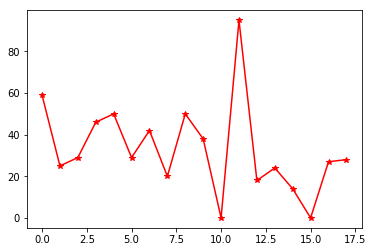

In [88]:
X = np.arange(1,19).reshape(-1,1) 
y = Covid_19Nov['New_cases'].values
plt.plot(y,'-r*')
plt.show()

## Using Polynomial of degree 4 to train the model

In [89]:
poly = PolynomialFeatures(degree = 4 )
Pt = poly.fit_transform(X)
reg_model = LinearRegression()
reg_model.fit(Pt, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
y_pred = reg_model.predict(Pt).round()

In [91]:
accuracy = reg_model.score(Pt,y)
print('Accuracy = ',accuracy*100,'%')

Accuracy =  18.039362971442774 %


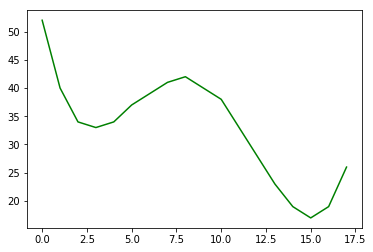

In [92]:
plt.plot(y_pred,'-g')
plt.show()

In [93]:
df = pd.DataFrame([y_pred,y])


In [94]:

y_pred = reg_model.predict(poly.fit_transform(np.array([20,21]).reshape(-1,1))).round()
y_pred

array([ 69., 108.])

# Using Ridge Regression 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ridgeR = linear_model.Ridge(alpha = 0.5)  
ridgeR.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [96]:
y_pre = ridgeR.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pre.flatten().round()})
print(df)

   Actual  Predicted
0      25       45.0
1      42       39.0
2      50       36.0
3       0       33.0
4      14       28.0
5      50       41.0


In [97]:
y_pre = ridgeR.predict(np.array([20,21]).reshape(-1, 1)).round()
y_pre.flatten()

array([21., 20.])

# Using LASSO Regression 


In [98]:
model = Lasso(alpha=1.0)  
model.fit(X, y)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [99]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
yl_pre = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yl_pre.flatten().round()})
df

Mean MAE: 18.361 (15.755)


,Actual,Predicted
0,25,43.0
1,42,36.0
2,50,34.0
3,0,31.0
4,14,26.0
5,50,39.0


In [100]:
yl_pre = model.predict(np.array([20,21]).reshape(-1, 1)).round()
yl_pre.flatten()

array([19., 17.])

## Question I 
#### (b) Considering the available data for 2021, what is the predicted average number of New_deaths for the whole of Africa for November 20, 2021 and November 21, 2021?

In [101]:
Covid19 = pd.read_csv("WHO-COVID-19-global-data.csv")

In [102]:
A =np.unique(Covid19.WHO_region)[0]

In [103]:
Cov_af = Covid19[Covid19["WHO_region"]==A]

# Using Ridge Regression 

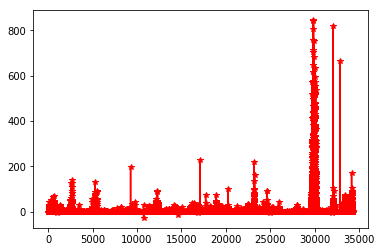

In [104]:
X1 = np.arange(1,Cov_af.shape[0]+1).reshape(-1,1) 
y1 = Cov_af['New_deaths'].values
plt.plot(y1,'-r*')
plt.show()

In [105]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
ridgeRR = linear_model.Ridge(alpha = 0.1)  
ridgeRR.fit(X1_train, y1_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
y1_pre = ridgeRR.predict(X1_test)
df = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pre.flatten().round()})

In [107]:
y1_pre = ridgeRR.predict(np.array([34302,34303]).reshape(-1, 1)).round()
y1_pre.flatten()

array([11., 11.])

## Using Polynomial of degree 4 to train the model

In [108]:
poly1 = PolynomialFeatures(degree = 4 )
P = poly1.fit_transform(X1)
reg_model1 = LinearRegression()
reg_model1.fit(P, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
y1_pred = reg_model1.predict(P).round()

In [110]:
accur = reg_model1.score(P,y1)
print('Accuracy = ',accur*100,'%')

Accuracy =  2.381452161201314 %


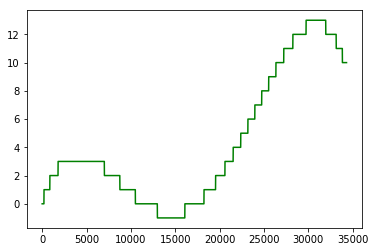

In [111]:
plt.plot(y1_pred,'-g')
plt.show()

In [112]:
y1_pred = reg_model1.predict(poly1.fit_transform(np.array([34302,34303]).reshape(-1,1))).round()
y1_pred

array([10., 10.])

# Question II

### a) Upload this data set and replace non-number data with a reasonable numerical representation


In [113]:
SAheart = pd.read_csv("SAheart.data.csv")

In [114]:
SAheart = SAheart.replace({'famhist': {'Present': 1,'Absent': 0}})

In [115]:
#pd.get_dummies(SAheart, columns=['famhist'])

# b) Train a logistic regressor to tell if a patient has high risk of CHD or not.


In [116]:
X=SAheart[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity','alcohol','age']].values
y=SAheart['chd'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)


In [117]:
log_reg = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [118]:
pr_y=log_reg.predict_proba(X_test) 
pr_y = np.round(pr_y, 2)
result = pd.DataFrame(pr_y, columns= np.unique(SAheart.chd))
predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]
predicted_Status =[np.unique(SAheart.chd)[i] for i in predictedt_index]
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=predicted_Status)
result.sample(10)

,Test,Predicted,0,1
81,1,0,0.83,0.17
52,1,1,0.07,0.93
54,0,0,0.93,0.07
83,1,0,0.52,0.48
118,1,1,0.20,0.80
26,1,0,0.66,0.34
49,0,1,0.29,0.71
89,0,0,0.62,0.38
75,0,0,0.85,0.15
32,1,0,0.86,0.14


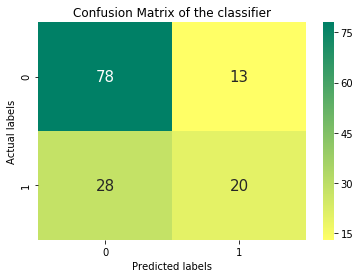

In [119]:
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat, annot=True, annot_kws={"size": 15},cmap="summer_r", xticklabels=np.unique(SAheart.chd),
           yticklabels=np.unique(SAheart.chd))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [120]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100,'%')

Accuracy: 70.50359712230215 %


#### c) Identify if the a patient with the following data is of high risk or not $x = [133, 3.3, 4.6, 34.5, present, 52, 30, 32, 20, 44].$

In [121]:
y_pred = log_reg.predict(np.array([[133, 3.3, 4.6, 34.5, 1, 52, 30, 32,44]]))
y_pred.flatten()

array([0])

#### d) Which are the most determinant factors for heart disease?

In [122]:
log_reg.coef_

array([[-0.012796  ,  0.10875657,  0.12803057,  0.08136055,  0.88152047,
         0.0283967 , -0.19361682, -0.00259573,  0.03150325]])

### i. famhist 
### ii. tobacco
### iii. ldl
### iv.  sbp
### v. obesity

#### e) Does having a family history of coronary heart disease affect a patients chance of having coronary heart disease?

### YES